In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , classification_report, precision_score, recall_score, f1_score , roc_auc_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler

In [5]:
df=pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [6]:
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [8]:
df.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

In [9]:
df["DEATH_EVENT"].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

In [10]:
# there is no big data imbalancing problem.

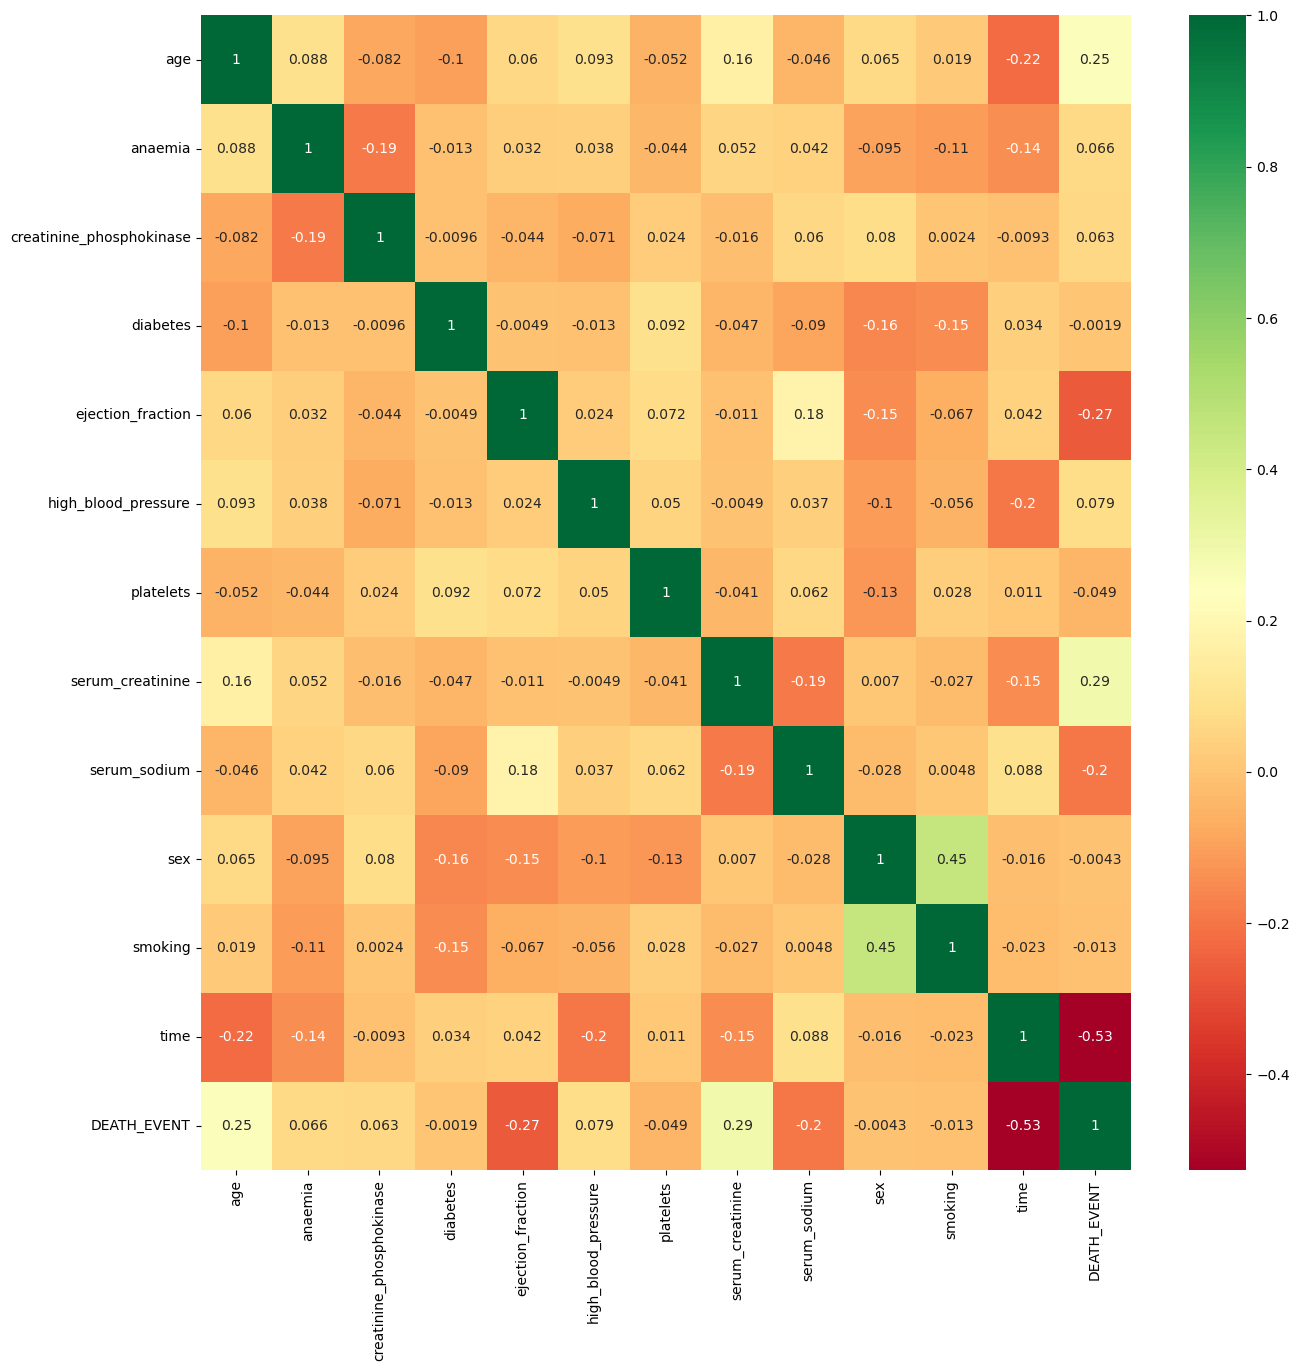

In [25]:
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True,cmap="RdYlGn")
plt.show()

In [12]:
#no independent variable is highly correlated with each other.

In [14]:
df.shape

(299, 13)

In [17]:
df.duplicated().sum()

0

In [18]:
# there are no rows which are dubplicated.

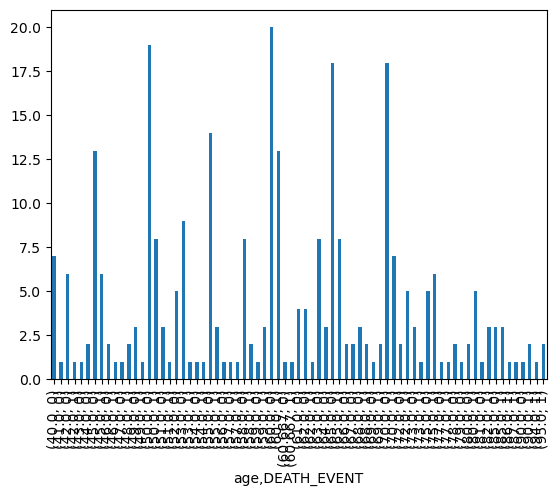

In [19]:
life=df.groupby(["age","DEATH_EVENT"]).size().plot(kind="bar")
plt.show()

In [22]:
bins = range(40,95, 5)  

# Create the frequency table using cut and value_counts
df_grouped = df.groupby(pd.cut(df["age"], bins))[["DEATH_EVENT"]].value_counts().unstack(fill_value=0)

# Print the frequency table
print(df_grouped.to_string())

DEATH_EVENT   0   1
age                
(40, 45]     23   7
(45, 50]     25  12
(50, 55]     32   6
(55, 60]     31  19
(60, 65]     38  10
(65, 70]     26  11
(70, 75]     10  12
(75, 80]      6   6
(80, 85]      4   6
(85, 90]      1   4


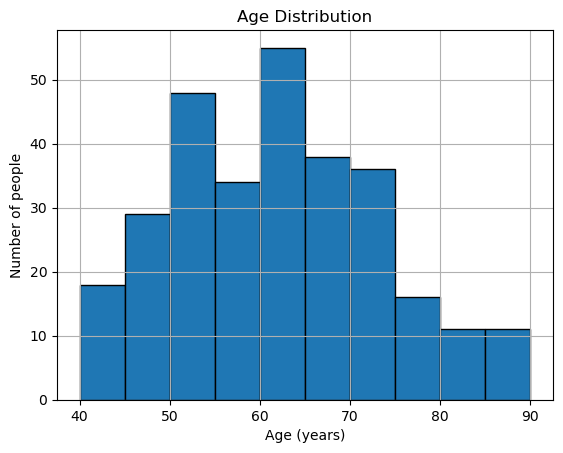

In [23]:
plt.hist(df["age"], bins=bins, edgecolor='black')
plt.xlabel("Age (years)")
plt.ylabel("Number of people")
plt.title("Age Distribution")
plt.grid(True)
plt.show()

In [29]:
X=df.drop(columns=["DEATH_EVENT"],axis=1)
Y=df["DEATH_EVENT"]

In [30]:
X.shape

(299, 12)

In [31]:
Y.shape

(299,)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [37]:
X_train.shape

(209, 12)

In [38]:
X_test.shape

(90, 12)

In [39]:
Y_test.shape

(90,)

In [40]:
Y_train.shape

(209,)

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [44]:
X_test_scaled

array([[0.18181818, 1.        , 0.01173769, ..., 1.        , 0.        ,
        0.51449275],
       [0.09090909, 0.        , 0.07131921, ..., 0.        , 0.        ,
        0.89130435],
       [0.23636364, 1.        , 0.00867568, ..., 0.        , 0.        ,
        0.14130435],
       ...,
       [0.18181818, 1.        , 0.13115591, ..., 0.        , 0.        ,
        0.87681159],
       [0.27272727, 0.        , 0.07004338, ..., 0.        , 0.        ,
        0.76449275],
       [0.14545455, 1.        , 0.07131921, ..., 0.        , 0.        ,
        0.03985507]])

In [45]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [75]:
model=keras.Sequential()
model.add(Dense(12,input_dim=12,activation="relu",kernel_initializer='he_normal'))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

C:\Users\023663\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [76]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 12)                  │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 12)                  │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 12)                  │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 12)                  │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 12)                  │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 793 (3.10 KB)

 Trainable params: 793 (3.10 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
model.compile(loss="binary_crossentropy",optimizer="adam")

In [91]:
history = model.fit(X_train_scaled,Y_train, epochs=100,validation_split=0.2)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1235 - val_loss: 1.9104
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1274 - val_loss: 1.8869
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1157 - val_loss: 1.9183
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1306 - val_loss: 1.8760
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1139 - val_loss: 1.9777
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1097 - val_loss: 1.9503
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1349 - val_loss: 2.0115
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1162 - val_loss: 1.9706
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0995 - val_loss: 1.9877
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1311 - val_loss: 2.0914
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0995 - val_loss: 1.9460
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1077 - val_loss: 2.1

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0770 - val_loss: 2.5217
Epoch 71/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0772 - val_loss: 2.3628
Epoch 72/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0795 - val_loss: 2.6813
Epoch 73/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0864 - val_loss: 2.7109
Epoch 74/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0720 - val_loss: 2.4029
Epoch 75/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0655 - val_loss: 2.6019
Epoch 76/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0788 - val_loss: 2.7786
Epoch 77/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0672 - val_loss: 2.7997
Epoch 78/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0805 - val_loss: 2.5481
Epoch 79/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0719 - val_loss: 2.4873
Epoch 80/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0607 - val_loss: 2.5811
Epoch 81/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0726 - val_loss: 2.5219

In [92]:
Y_pred = np.rint(model.predict(X_test_scaled))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [93]:
Y_pred

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],

In [94]:
from sklearn.metrics import classification_report
cr= (classification_report(Y_test, Y_pred))

In [95]:
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        64
           1       0.65      0.50      0.57        26

    accuracy                           0.78        90
   macro avg       0.73      0.70      0.71        90
weighted avg       0.77      0.78      0.77        90



In [98]:
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [99]:
from sklearn.metrics import accuracy_score , classification_report, precision_score, recall_score, f1_score , roc_auc_score
cm=  confusion_matrix(Y_test,Y_pred)

In [100]:
print(cm)

[[57  7]
 [13 13]]


In [101]:
acc = accuracy_score(Y_test,Y_pred)

In [102]:
print(acc)

0.7777777777777778


In [103]:
#data set is very small , we should increase the size of data set for moore accuracy . Deep learning is effective when data